In [1]:
from tensorflow import keras

In [2]:
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

In [4]:
for i in np.unique(labels):
  print(i,labels.tolist().count(i))

0 558
1 558
2 558
3 558
4 558


## ... let´s see the $labels$

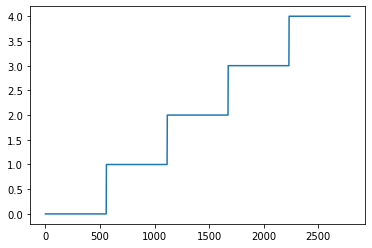

In [5]:
plt.plot(labels)

## ... and now let's see one image...

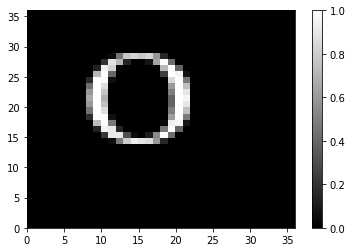

In [6]:
plt.pcolor(train[8], cmap=plt.cm.gray)
plt.colorbar()


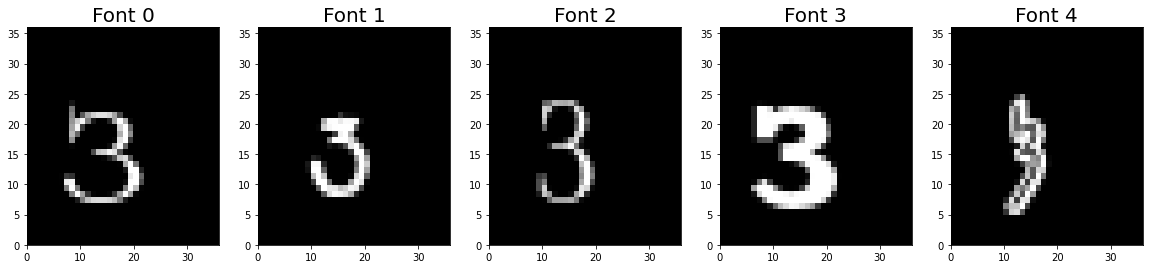

In [7]:
f, plts = plt.subplots(1,5, figsize=(20,4), sharex=True)
c = 28
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray)
    plts[i].set_title('Font %d'%i, size=20)

In [8]:
from keras.utils import to_categorical
onehot= to_categorical(labels, num_classes=len(np.unique(labels)))


In [9]:
 
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]
  

In [10]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36) 
Test shape= (279, 36, 36)


### Reshape to represent each image as a vector

In [11]:
train=train.reshape([-1,train.shape[1]*train.shape[2]])
test=test.reshape([-1,test.shape[1]*test.shape[2]])

In [12]:
print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 1296) 
Test shape= (279, 1296)


# <font color= #b30047>[Keras](https://keras.io/) Models </font>

- ## The core data structure of Keras is a model, a way to organize layers.


## The construction of deep learning models in Keras is as follows:

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.






## 1.   **Define your model**. Create a sequence and add layers.

* The simplest type of model is the <font color= #b30047>**Sequential**</font> model: a linear stack of layers.

For more complex architectures, you should use the <font color= #b30047>**Keras functional API**</font>, which allows to build arbitrary graphs of layers.


# Single layer Perceptron

In [15]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam,Ftrl
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()

model.add(Dense(onehot_train.shape[1], activation='softmax', input_dim=train.shape[1]))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 11ms/step - loss: 1.5684 - accuracy: 0.2289 - val_loss: 1.4332 - val_accuracy: 0.3405
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3574 - accuracy: 0.3833 - val_loss: 1.3249 - val_accuracy: 0.3943
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.2273 - accuracy: 0.4999 - val_loss: 1.2363 - val_accuracy: 0.4910
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1456 - accuracy: 0.5523 - val_loss: 1.1620 - val_accuracy: 0.5520
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 1.0760 - accuracy: 0.6497 - val_loss: 1.1249 - val_accuracy: 0.5520
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0212 - accuracy: 0.6544 - val_loss: 1.0886 - val_accuracy: 0.6022
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0031 - accuracy: 0.6794 - val_loss: 1.0539 - val_accuracy: 0.6093
Epoch 8/100

#Multi-layered perceptron


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax,Nadam,Ftrl

models = []
functions=['relu','sigmoid','softmax','softplus','softsign','tanh','selu','elu','exponential']
dimensions = [8,16,32,64,128,256,512]

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = RMSprop(lr=0.01, decay=1e-6, momentum=0.9)
adam = Adam(lr=0.01, decay=1e-6)
adadelta = Adadelta(lr=0.01, decay=1e-6)
adagrad = Adagrad(lr=0.01, decay=1e-6)
adamax = Adamax(lr=0.01, decay=1e-6)
nadam = Nadam(lr=0.01, decay=1e-6)
ftrl = Ftrl(lr=0.01, decay=1e-6)

opt=[sgd,rmsprop,adam,adadelta,adagrad,adamax,nadam,ftrl]
optimizers=['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']


for op in opt:
  model = Sequential()

  model.add(Dense(56, activation='relu', input_dim=train.shape[1]))
  model.add(Dense(onehot_train.shape[1], activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer=op,
              metrics=['accuracy'])
  models.append(model)

## 3.   **Fit your model**. Train the model using data.

* We first pass in all of our training data, in our case, *train* data and *OHE labels* onehot_train.
* The next argument is the batch size – we don’t have to explicitly handle the batching up of our data during training in Keras, rather we just specify the batch size and it does it for us (in this example batch size is 128)

However you can choose to feed batches to your model manually: model.train_on_batch(train_batch, onehot_train_batch)


* Next we pass the number of training epochs (20 in this case).
* A verbose flag, set to 1 here, specifies if you want detailed information being printed in the console about the progress of the training.

In [ ]:
model.fit(train, onehot_train,
         epochs=150,
         batch_size=128,
         verbose=1)

Epoch 1/150
20/20 [==============================] - 0s 4ms/step - loss: 1.6800 - accuracy: 0.2455
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 1.4754 - accuracy: 0.4343
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 1.3580 - accuracy: 0.5084
Epoch 4/150
20/20 [==============================] - 0s 4ms/step - loss: 1.2744 - accuracy: 0.5421
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 1.2217 - accuracy: 0.5628
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 1.1515 - accuracy: 0.6259
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 1.1155 - accuracy: 0.6243
Epoch 8/150
20/20 [==============================] - 0s 4ms/step - loss: 1.0736 - accuracy: 0.6356
Epoch 9/150
20/20 [==============================] - 0s 4ms/step - loss: 1.0511 - accuracy: 0.6180
Epoch 10/150
20/20 [==============================] - 0s 4ms/step - loss: 1.0041 - accuracy: 0.6560
Epoch 11/

## 4.   **Make predictions**. Use the model to generate predictions on new data.

* The model evaluates the loss across all of the test data, as well as any other metrics specified when the model was compiled, like classification accuracy.

* A list of evaluation metrics is returned. For example, for a model compiled with the accuracy metric, we could evaluate it on a new dataset.

<font color=orange>Note that evaluation is done in batches</font>

In [ ]:
# Check accuracy on train set

loss, accuracy = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8833

Training Accuracy= 0.8833134174346924


In [ ]:
# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.7384

Test Accuracy= 0.7383512258529663


# Get predictions / probabilities ...

In [ ]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[8.3575472e-02 4.0056169e-02 3.5655238e-02 1.0116843e-03 8.3970141e-01]
 [3.6593816e-01 5.2042091e-01 9.1412783e-02 3.7884124e-04 2.1849301e-02]
 [2.0744845e-02 4.0788746e-01 1.7007799e-03 3.5906648e-03 5.6607628e-01]
 [4.3159541e-01 2.7379780e-03 5.6424940e-01 1.1685013e-05 1.4055059e-03]
 [4.1519976e-04 9.7448319e-02 2.9067136e-05 4.2935082e-01 4.7275659e-01]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

Confusion Matrix:
 [[41  8  6  0  6]
 [ 7 48  5  1 10]
 [10  3 33  0  2]
 [ 0  0  0 41  2]
 [ 6  7  0  0 43]]


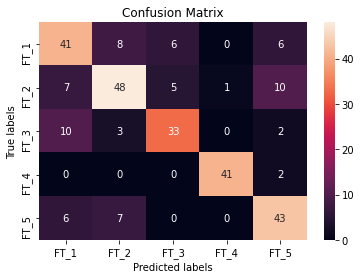

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

### ... you can also check *validation data* while training...

In [ ]:
model.fit(train, onehot_train,
         epochs=10,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Epoch 1/10
20/20 [==============================] - 0s 8ms/step - loss: 0.3944 - accuracy: 0.8821 - val_loss: 0.6796 - val_accuracy: 0.7419
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8825 - val_loss: 0.6737 - val_accuracy: 0.7455
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.8813 - val_loss: 0.6760 - val_accuracy: 0.7455
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3894 - accuracy: 0.8821 - val_loss: 0.6782 - val_accuracy: 0.7419
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3887 - accuracy: 0.8809 - val_loss: 0.6741 - val_accuracy: 0.7419
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3863 - accuracy: 0.8853 - val_loss: 0.6817 - val_accuracy: 0.7455
Epoch 7/10
20/20 [==============================] - 0s 12ms/step - loss: 0.3852 - accuracy: 0.8821 - val_loss: 0.6763 - val_accuracy: 0.7455
Epoch 8/10
20/20 [=

# The code in next section is needed to **RESET THE MODEL** (initalize weights)

In [ ]:
import tensorflow as tf
for ix, layer in enumerate(model.layers):
    if hasattr(model.layers[ix], 'kernel_initializer') and \
            hasattr(model.layers[ix], 'bias_initializer'):
        weight_initializer = model.layers[ix].kernel_initializer
        bias_initializer = model.layers[ix].bias_initializer

        old_weights, old_biases = model.layers[ix].get_weights()

        model.layers[ix].set_weights([
            weight_initializer(shape=old_weights.shape),
            bias_initializer(shape=old_biases.shape)])

... you can also get useful **History** info...

In [ ]:
histories = []
for model in models:
  history=model.fit(train, onehot_train,
         epochs=500,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=0)
  histories.append(history)

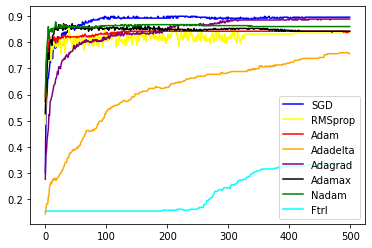

In [ ]:
colors=['blue','yellow','red','orange','purple','black','green','cyan']
for i in range(len(histories)):
  plt.plot(histories[i].history['val_accuracy'],colors[i])
plt.legend(optimizers)
plt.show()


Train Accuracy (blue):  0.96
Test_Accuracy (red):  0.79
Train loss (blue):  0.16
Test loss (red):  0.56


<Figure size 432x288 with 0 Axes>

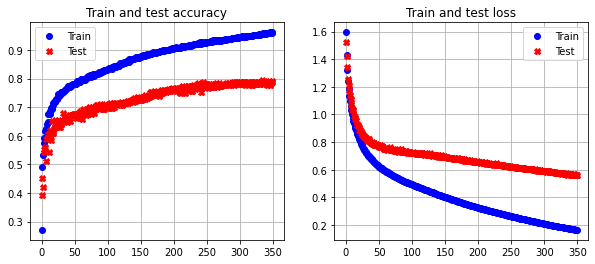

In [ ]:
plt.figure()

plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)

print('Train Accuracy (blue): ',np.round(history.history['accuracy'][-1],2))
print('Test_Accuracy (red): ',np.round(history.history['val_accuracy'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('Train and test accuracy')
plt.legend(['Train','Test'])
plt.grid()

plt.subplot(1,2,2)
print('Train loss (blue): ',np.round(history.history['loss'][-1],2))
print('Test loss (red): ',np.round(history.history['val_loss'][-1],2))

# Plot the loss curves
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.title('Train and test loss')
plt.legend(['Train','Test'])
plt.grid()

Train loss (blue):  0.53
Test loss (red):  0.79


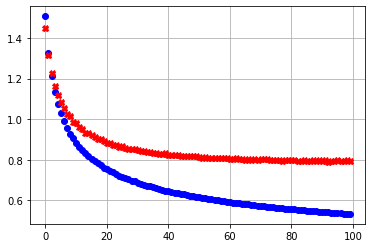

In [ ]:
print('Train loss (blue): ',np.round(history.history['loss'][-1],2))
print('Test loss (red): ',np.round(history.history['val_loss'][-1],2))

# Plot the loss curves
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.grid()

---
## Some visualizations
---

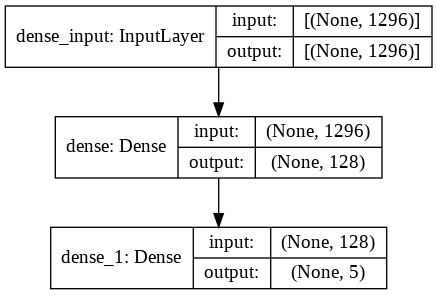

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Looking for "interpretability" ... exploring the information in Layer Weights Matrix


---

## [The Building Blocks of Interpretability](https://distill.pub/2018/building-blocks/)

## * <font color=red>you should consider following [Distill](https://distill.pub/) </font>

In [ ]:
#This is the input tensor
model.layers[0].input

<KerasTensor: shape=(None, 1296) dtype=float32 (created by layer 'dense_5_input')>

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_5/kernel:0' shape=(1296, 5) dtype=float32, numpy=
 array([[ 0.03505909, -0.04684305,  0.01219606, -0.00898748, -0.02931888],
        [-0.04937644,  0.00267442,  0.02906882, -0.03378725, -0.02010057],
        [ 0.0226209 ,  0.02246492, -0.06627712,  0.06299117,  0.0214966 ],
        ...,
        [ 0.05770254,  0.00967436, -0.03081183,  0.04201204,  0.00780309],
        [ 0.03648154,  0.0609663 ,  0.06180297,  0.04441352,  0.03240366],
        [ 0.01646893,  0.03870557, -0.05688164, -0.00425278, -0.03906192]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 3.1629636 , -0.32593855,  2.660161  , -5.0215487 , -0.4756391 ],
       dtype=float32)>]

In [ ]:
#Note that weights and biases are already numpy arrays.

weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [ ]:
weights.shape

(1296, 5)

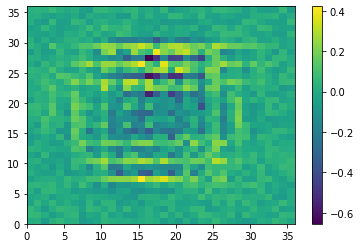

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pcolor(weights[:,2].reshape([36,36]))

plt.colorbar()

IndexError: ignored

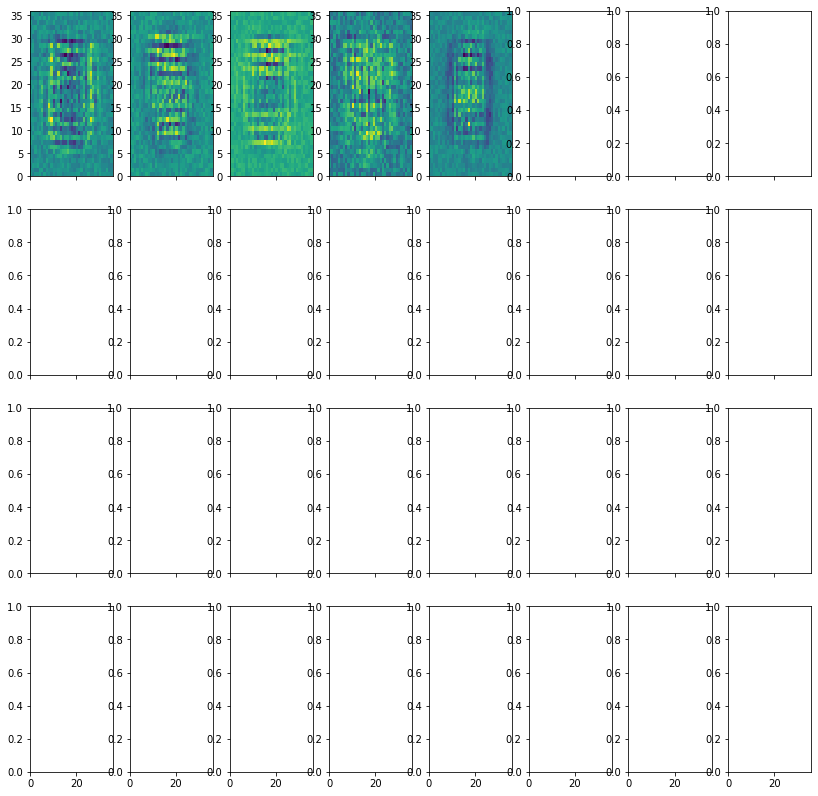

In [ ]:
# Let's look at a subplot of some weights
f, plts = plt.subplots(4,8, figsize=(14,14), sharex=True)
for i in range(32):
    plts[i//8, i%8].pcolor(weights[:,i].reshape([36,36]))

In [ ]:
# Let's see the last layer

model.layers[2].weights

[<tf.Variable 'dense_2/kernel:0' shape=(32, 5) dtype=float32, numpy=
 array([[ 0.2513463 ,  0.646431  ,  1.1331372 , -1.1564085 , -0.03239885],
        [-0.3184137 ,  1.4410133 ,  0.15790157,  0.41689512, -1.2305521 ],
        [ 0.642562  , -0.0811948 , -0.38892618,  0.610554  , -1.4212105 ],
        [ 1.3248631 ,  1.676883  , -1.0518786 , -0.8781104 , -0.96150404],
        [-0.16830353,  0.3665073 , -1.4037185 ,  1.0659671 ,  0.46500412],
        [-1.0992295 ,  0.18778956, -0.08577917,  0.4586069 ,  0.9712754 ],
        [-1.0755657 ,  1.203294  , -1.6499982 ,  1.0096189 ,  0.81132925],
        [-1.1814454 ,  0.236561  ,  1.9310315 , -0.57998055,  0.41795003],
        [ 1.6099553 , -0.01066722,  0.17741323, -0.8916957 , -1.0921938 ],
        [-0.95050865,  0.3590296 , -0.5030738 ,  1.0192391 ,  0.4799101 ],
        [-0.6322656 , -0.72313184, -0.39984223,  0.68590784,  0.38693866],
        [ 0.7001033 ,  0.34563854,  0.5321841 , -0.85433805,  0.44057342],
        [-0.08444713, -0.755669

In [ ]:
weights_last = model.layers[2].get_weights()[0]

weights_last.shape

IndexError: ignored

NameError: ignored

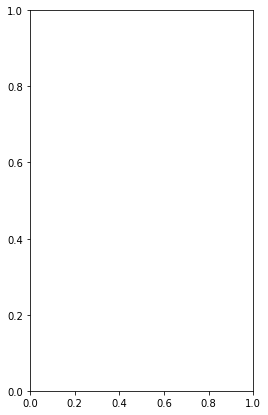

In [ ]:
# Examine the output weights

import numpy as np

plt.subplots(figsize=(4,7))
plt.pcolor(weights_last,cmap='RdBu_r')
plt.colorbar()